Import Libraries

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

Reading Dataset And Get Info

In [4]:
Hypertension_df = pd.read_csv(r"hypertension.csv")
Hypertension_df

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,185.0,141.0,98.0,25.60,67.0,72.0,1


In [5]:
Hypertension_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
Hypertension_df.tail()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
4235,0,48,1,20.0,NaN,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,185.0,141.0,98.0,25.60,67.0,72.0,1
4239,0,39,1,30.0,0.0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [7]:
Hypertension_df.shape

(4240, 13)

In [8]:
Hypertension_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4240 non-null   int64  
 1   age            4240 non-null   int64  
 2   currentSmoker  4240 non-null   int64  
 3   cigsPerDay     4211 non-null   float64
 4   BPMeds         4187 non-null   float64
 5   diabetes       4240 non-null   int64  
 6   totChol        4190 non-null   float64
 7   sysBP          4240 non-null   float64
 8   diaBP          4240 non-null   float64
 9   BMI            4221 non-null   float64
 10  heartRate      4239 non-null   float64
 11  glucose        3852 non-null   float64
 12  Risk           4240 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 430.8 KB


In [9]:
Hypertension_df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
count,4240.000000,4240.000000,4240.000000,4211.000000,4187.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.005937,0.029615,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.310613
std,0.495027,8.572942,0.500024,11.922462,0.169544,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.462799
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,1.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Handling Missing Data & Duplicates

In [10]:
Hypertension_df.duplicated().sum()

0

In [11]:
Hypertension_df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay        29
BPMeds            53
diabetes           0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          388
Risk               0
dtype: int64

In [12]:
Hypertension_df.dropna(how='any',inplace=True)

EDA

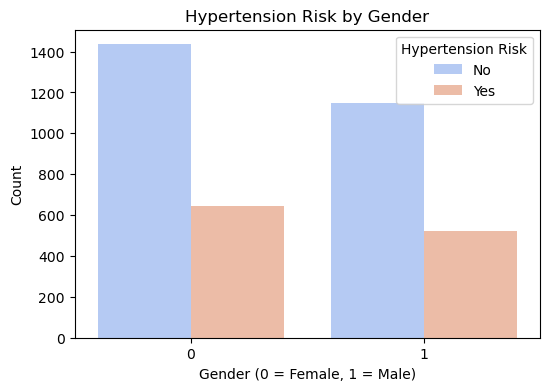

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x="male", hue="Risk", data=Hypertension_df, palette="coolwarm")
plt.title("Hypertension Risk by Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title="Hypertension Risk", labels=["No", "Yes"])
plt.show()


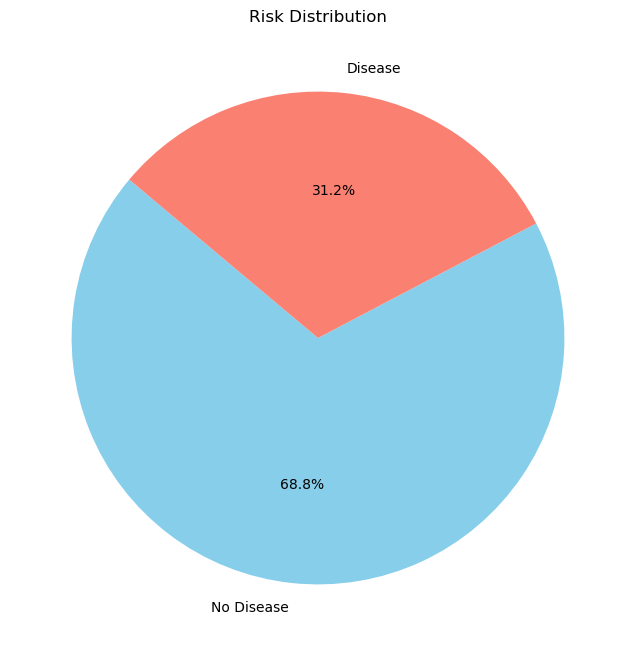

In [14]:
target_counts = Hypertension_df["Risk"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=["No Disease", "Disease"], autopct='%1.1f%%', startangle=140, colors=["skyblue", "salmon"])
plt.title("Risk Distribution")
plt.show() 

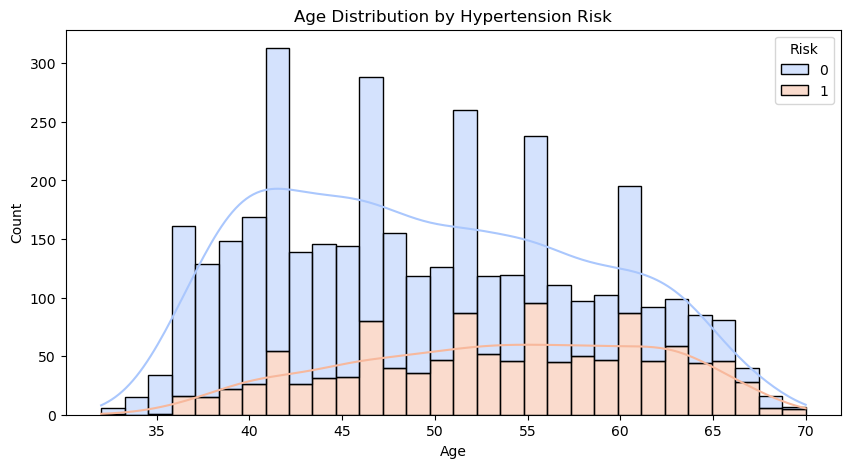

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(data=Hypertension_df, x="age", hue="Risk", multiple="stack", bins=30, palette="coolwarm", kde=True)
plt.title("Age Distribution by Hypertension Risk")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


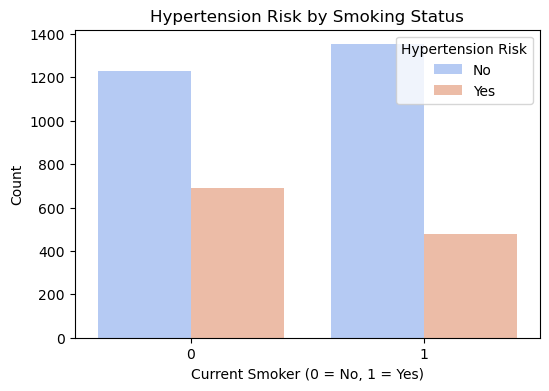

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x="currentSmoker", hue="Risk", data=Hypertension_df, palette="coolwarm")
plt.title("Hypertension Risk by Smoking Status")
plt.xlabel("Current Smoker (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Hypertension Risk", labels=["No", "Yes"])
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_18052\1090023466.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Risk", y="cigsPerDay", data=Hypertension_df, palette="coolwarm")


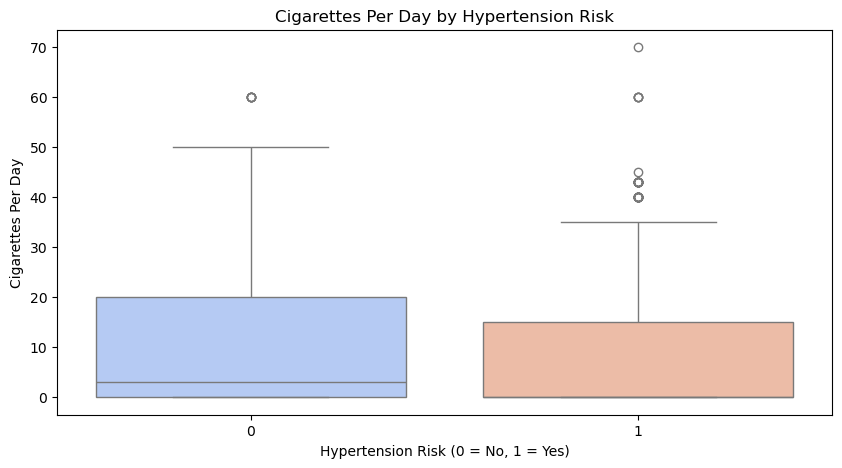

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Risk", y="cigsPerDay", data=Hypertension_df, palette="coolwarm")
plt.title("Cigarettes Per Day by Hypertension Risk")
plt.xlabel("Hypertension Risk (0 = No, 1 = Yes)")
plt.ylabel("Cigarettes Per Day")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_18052\1190697235.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Risk", y="sysBP", data=Hypertension_df, palette="coolwarm")


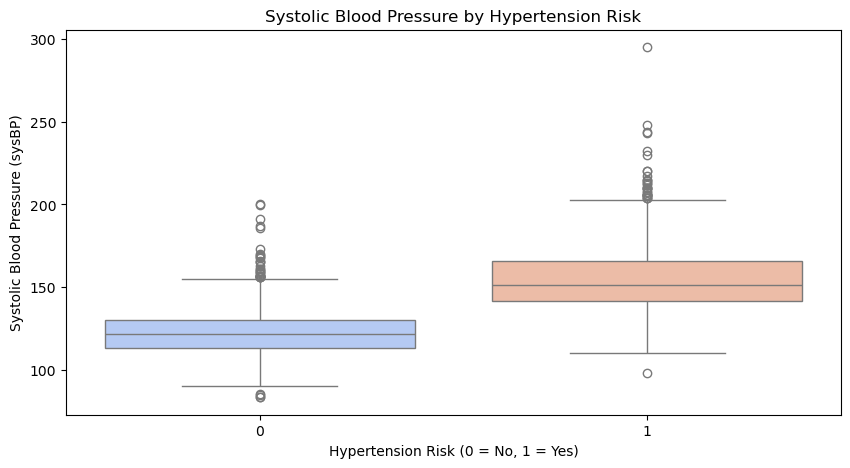

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Risk", y="sysBP", data=Hypertension_df, palette="coolwarm")
plt.title("Systolic Blood Pressure by Hypertension Risk")
plt.xlabel("Hypertension Risk (0 = No, 1 = Yes)")
plt.ylabel("Systolic Blood Pressure (sysBP)")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_18052\2943647952.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Risk", y="diaBP", data=Hypertension_df, palette="coolwarm")


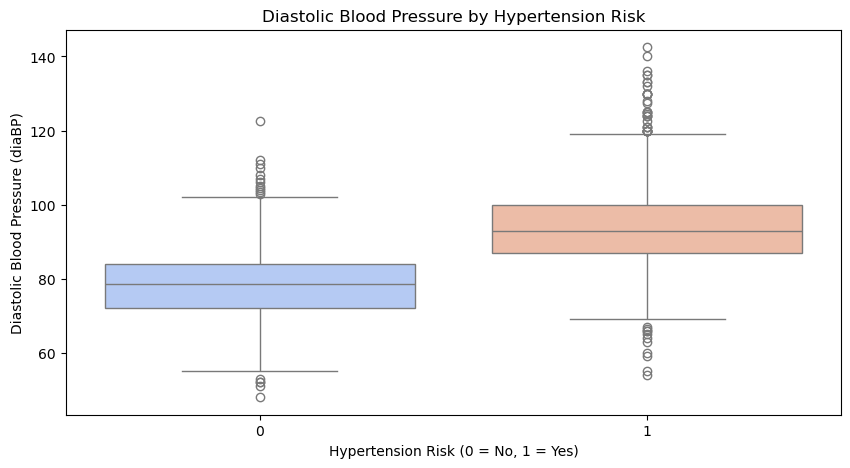

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Risk", y="diaBP", data=Hypertension_df, palette="coolwarm")
plt.title("Diastolic Blood Pressure by Hypertension Risk")
plt.xlabel("Hypertension Risk (0 = No, 1 = Yes)")
plt.ylabel("Diastolic Blood Pressure (diaBP)")
plt.show()

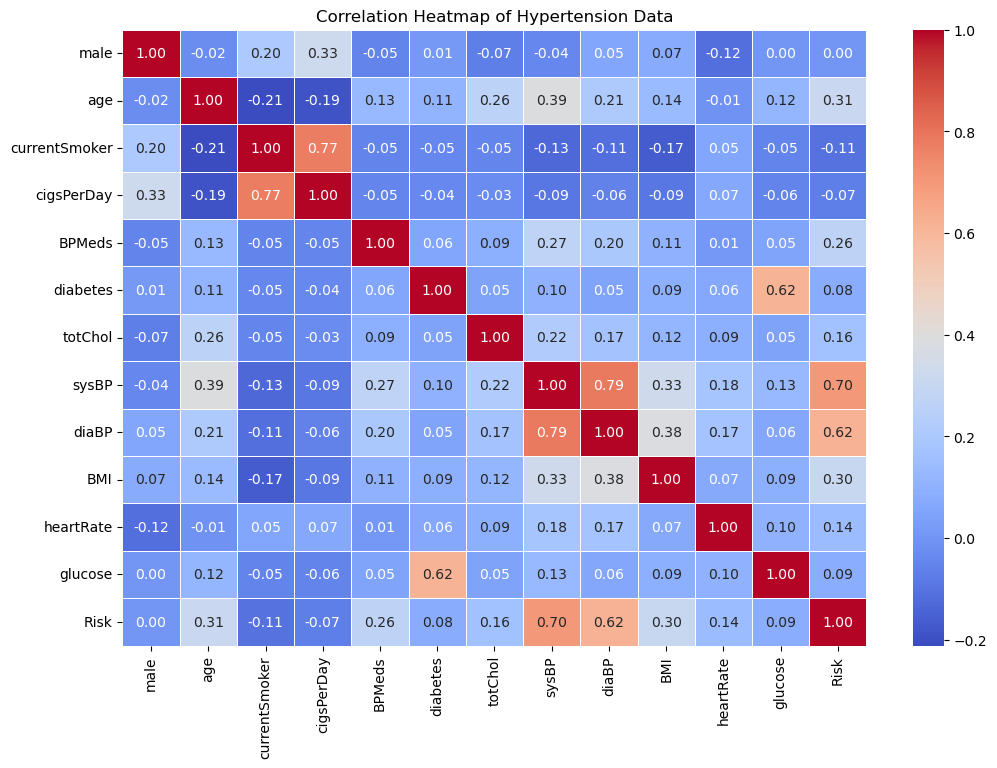

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(Hypertension_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Hypertension Data")
plt.show()


Data Preprocessing

In [21]:
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    ls=df.index[(df[ft]<lower_bound) | (df[ft]>upper_bound)]
    return ls

In [22]:
index_list=[]
for feature in ['male','age','currentSmoker','cigsPerDay','BPMeds','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']:
    index_list.extend(outliers(Hypertension_df,feature))

In [23]:
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df
Hypertension_df=remove(Hypertension_df,index_list)

In [24]:
# checking the distribution of Risk Variable
Hypertension_df['Risk'].value_counts()

Risk
0    2396
1     794
Name: count, dtype: int64

In [25]:
#Splitting the Features and Target
x = Hypertension_df.drop(columns='Risk', axis=1)
y = Hypertension_df['Risk']

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [27]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [28]:
# print shapes of the datasets
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Features Shape: (2233, 12)
Testing Features Shape: (957, 12)
Training Target Shape: (2233,)
Testing Target Shape: (957,)


Modeling

In [29]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'GaussianNB': GaussianNB()
}

In [30]:
# Train and evaluate models
accuracy_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    print(f'Accuracy of {name}: {accuracy:.4f}')

Accuracy of Logistic Regression: 0.8830
Accuracy of Decision Tree: 0.8464
Accuracy of Random Forest: 0.8903
Accuracy of SVC: 0.8757
Accuracy of Gradient Boosting: 0.8913
Accuracy of AdaBoost: 0.8882
Accuracy of GaussianNB: 0.8715


C:\Users\hp\AppData\Local\Temp\ipykernel_18052\1901461713.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')


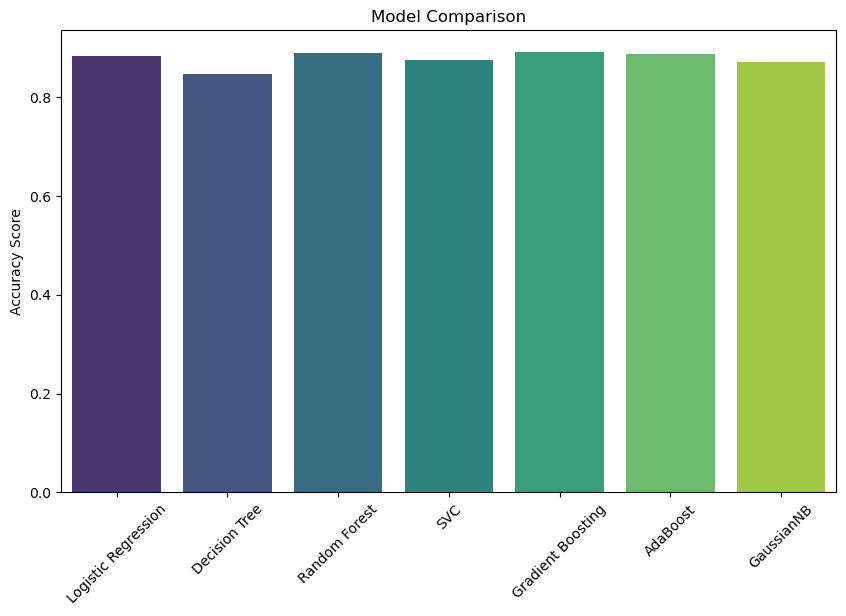

In [31]:
# Plot accuracy scores
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')
plt.xticks(rotation=45)
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.show()

In [32]:
# Choose best model
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
Hypertension_model = models[best_model_name]
Hypertension_model.fit(X_train, y_train)
print(f'Best Model: {best_model_name} with Accuracy: {accuracy_scores[best_model_name]:.4f}')

Best Model: Gradient Boosting with Accuracy: 0.8913


In [33]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2)
input_data_as_numpy_array= np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = Hypertension_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person is not Hypertensive')
else:
  print('The Person is Hypertensive')

[1]
The Person is Hypertensive
